In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import tensorflow as tf

import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


In [2]:
econ_df = pd.read_csv(
    "Resources/Refined Data Set.csv"
)

econ_df

,Time,GDP/capita growth (%),Access to electricity,Literacy rate (adult female),Literacy rate (youth female),Literacy rate (youth male),Literacy rate (adult male),Life expectancy at birth (female),Life expectancy at birth (\male),Primary school enrollment (net%),Labor force participation rate (female%),Labor force participation rate (male%),Net migration
0,1993,2.357339,89.318225,85.145782,93.649338,91.902779,87.969719,72.065137,65.750388,91.702070,40.455670,71.564291,-799413
1,1994,3.575111,90.223083,85.700523,94.091949,92.659912,88.555008,72.408284,66.149040,91.175760,41.652467,71.242033,-727304
2,1995,-0.841473,88.599506,86.312340,94.521599,93.420387,88.824631,72.754166,66.425347,91.075740,42.849265,70.919774,-812708
3,1996,2.367651,89.557909,86.693207,94.821121,93.742462,89.099770,73.117666,66.802275,91.551620,42.556270,69.970452,-814722
4,1997,3.620615,90.015864,86.990997,94.866676,93.907623,89.505096,73.483913,67.154166,90.591650,43.339769,69.828303,-802462
5,1998,1.059776,90.636887,87.535812,95.135422,94.211693,89.744217,73.701137,67.433797,92.100535,43.640127,69.902232,-798462
6,1999,-0.865684,91.247588,87.886726,95.358742,94.382912,89.914337,74.114224,67.825597,93.609420,44.277077,69.962526,-870278
7,2000,2.058134,91.725741,88.205704,95.574059,94.570038,90.085747,74.563693,68.032323,94.227670,44.399940,69.168548,-933168
8,2001,-0.919453,92.342229,88.230637,95.670761,94.702438,90.132202,74.842232,68.273577,94.465920,44.522803,68.374571,-949876
9,2002,-0.832495,92.646073,88.410057,95.978668,95.125069,90.849586,75.167799,68.639360,94.293610,46.116231,68.819754,-947054


In [3]:
# Creating the X and y sets
y = econ_df["GDP/capita growth (%)"]
X = econ_df.drop(columns=["GDP/capita growth (%)"])

In [4]:
# Split the data into traning and testing sets using the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
#instantiate
nn = Sequential()

# Define the the number of inputs and layer nodes
n_inputs = 12
hidden_nodes_l1 = 144
hidden_nodes_l2 = 24
# hidden_nodes_l3 = 14


# hidden layers 
nn.add(Dense(units=hidden_nodes_l1, input_dim=n_inputs, activation="linear"))

nn.add(Dense(units=hidden_nodes_l2, activation="linear"))

# nn1.add(Dense(units=hidden_nodes_l3, activation="linear"))

# output
nn.add(Dense(1, activation="linear"))

In [7]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 144)               1872      
                                                                 
 dense_1 (Dense)             (None, 24)                3480      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the Sequential model
# nn1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [9]:
# Compile the Sequential model
nn.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer="adam")

In [10]:
# Fit the model using 100 epochs and the training data
nn_model_1 = nn.fit(X_train_scaled, y_train, epochs=500, verbose=0)

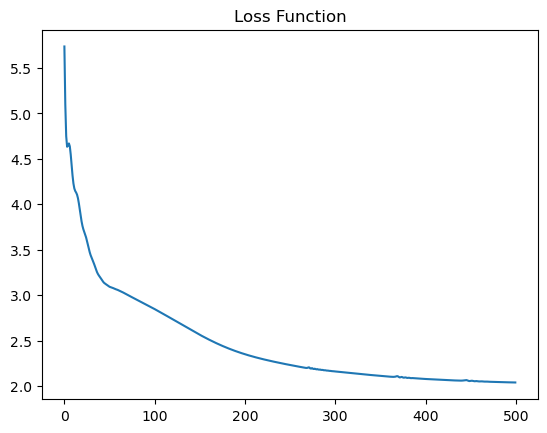

In [12]:
# Plot the train function
plt.plot(nn_model_1.history["loss"])
plt.title("Loss Function")
plt.show()

In [13]:
# Evaluate the model fit with linear dummy data
model_loss = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}")

1/1 - 0s - loss: 3.7498 - 205ms/epoch - 205ms/step
Loss: 3.749830722808838


In [14]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
nn_json_path_1 = Path("Models/nn.json")

# Write the model to the the file 
with open(nn_json_path_1, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
nn_h5_path_1 = "Models/nn.h5"

# Save the weights to the file path
nn.save_weights(nn_h5_path_1)

In [15]:
from tensorflow.keras.models import model_from_json
# Load the model to predict values
# Identify the relative path of the model's location
nn_json_path_2 = Path("Models/nn.json")

# Read in the model and save it as the variable loaded_model
with open(nn_json_path_2, "r") as json_file:
    model_json = json_file.read()
nn_model_2 = model_from_json(model_json)

# Identify the relative path for the model's weights
nn_h5_path_2 = "Models/nn.h5"

# Load the model's weights to the variable loaded_model
nn_model_2.load_weights(nn_h5_path_2)

In [17]:
# y_pred = nn1_model.predict(X_test_scaled)
y_pred = nn_model_2.predict(X_test_scaled, verbose=0)
y_pred

array([[2.0008454],
       [2.5624526],
       [1.2334248],
       [1.3838837],
       [1.5262548],
       [0.5300383],
       [2.027661 ]], dtype=float32)

In [18]:
# Import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
std = np.std(y_test)

In [19]:
print(f"The r2 is {r2}.") 
print(f"The mean squared error is {mse}.") 
print(f"The root mean squared error is {rmse}.") 
print(f"The standard deviation is {std}.")

The r2 is 0.013863889558551779.
The mean squared error is 3.7498302833734436.
The root mean squared error is 1.9364478519633426.
The standard deviation is 1.9500124087691886.
